In [1]:
import numpy as np
import os
import struct

In [2]:
def load_mnist(path, kind):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' %kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte' %kind)
   
    with open(labels_path, 'rb') as lb_path:
        magic, n = struct.unpack('>II', lb_path.read(8))
        labels = np.fromfile(lb_path, dtype=np.uint8)
    
    with open(images_path, 'rb') as images_path:
        magic, num, rows, cols = struct.unpack(">IIII", images_path.read(16))
        images = np.fromfile(images_path, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

In [3]:
X_train, y_train = load_mnist('.\data', 'train')

In [4]:
X_test, y_test = load_mnist('.\data', 't10k')

In [5]:
X_train.shape

(60000L, 784L)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

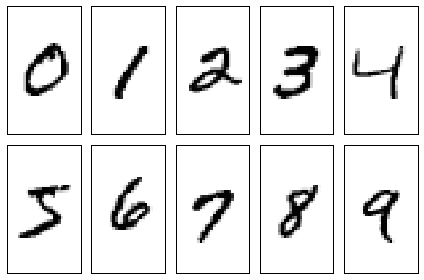

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5,sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation= 'nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()

In [8]:
from scipy.special import expit
import sys

In [55]:
class MLP(object):
    def __init__(self, n_output, n_features, n_hidden=30, L1=0.0, L2=0.0, epochs=500, eta=0.0001, alpha=0.0, \
                 decrease_const=0.0, shuffle=True, minibatches=1, random_state=1):
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.L1 = L1
        self.L2 = L2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.W1, self.W2 = self.__initialize_weights()
        
    def __initialize_weights(self):
        W1 = np.random.uniform(low=-1, high=1, size=self.n_hidden * (self.n_features + 1))
        W1 = W1.reshape((self.n_hidden, self.n_features + 1))
        
        W2 = np.random.uniform(low=-1, high=1, size=self.n_output * (self.n_hidden + 1))
        W2 = W2.reshape((self.n_output, self.n_hidden + 1))
        
        return W1, W2
    
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __sigmoid_gradient(self, z):
        sg = self.__sigmoid(z)
        return sg * (1-sg)
    
    def feedforward( X, W1, W2):
        N = np.ones((X.shape[0], X.shape[1]+1),dtype=np.int8)
        N[:,1:] = X
        X = N
        return X

In [30]:
u = [[ 2, 1],[ 2, 3],[5,5]]

In [31]:
v =[[1,4,2],[0,1,2],[0,4,2]]

In [12]:
np.array(u).dot(np.array(v))

array([[ 2,  9,  6],
       [ 2, 11, 10],
       [ 5, 25, 20]])

In [35]:
v = np.array(v)
d = np.ones((v.shape[0],v.shape[1] + 1),dtype=np.int8)[:,1:]
d = v
d

array([[1, 1, 4, 2],
       [1, 0, 1, 2],
       [1, 0, 4, 2]], dtype=int8)

In [53]:
def feedforward( X, W1, W2):
    N = np.ones((X.shape[0], X.shape[1]+1),dtype=np.int8)
    N[:,1:] = X
    X = N
    return X

In [54]:
f = feedforward(v, [], [])
f

array([[1, 1, 4, 2],
       [1, 0, 1, 2],
       [1, 0, 4, 2]], dtype=int8)